In [59]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf

In [60]:

stock = ['GOOGL', 'GS', 'JPM', 'BAC']
data = yf.download(stock,start='2017-12-01',end='2017-12-31')['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [61]:
data=data.iloc[::-1]
print (data.round(2))

              BAC  GOOGL      GS    JPM
Date                                   
2017-12-29  25.87  52.67  224.97  89.83
2017-12-28  26.12  52.80  226.51  90.55
2017-12-27  26.05  53.01  226.02  90.07
2017-12-26  26.10  53.29  227.58  89.90
2017-12-22  26.19  53.44  228.69  90.26
2017-12-21  26.13  53.54  230.49  90.58
2017-12-20  25.84  53.68  225.34  89.16
2017-12-19  25.81  53.99  226.49  89.47
2017-12-18  25.84  54.25  229.62  89.85
2017-12-15  25.45  53.60  227.10  89.16
2017-12-14  25.18  52.87  225.61  87.92
2017-12-13  25.27  52.57  225.68  88.63
2017-12-12  25.69  52.44  227.55  89.76
2017-12-11  25.36  52.60  220.88  88.72
2017-12-08  25.46  52.47  221.08  88.98
2017-12-07  25.22  52.23  219.50  87.88
2017-12-06  25.10  51.64  217.19  88.14
2017-12-05  25.35  50.98  219.29  88.81
2017-12-04  25.47  50.59  221.34  89.84
2017-12-01  24.63  51.25  219.84  88.03


In [62]:
stock_ret = data.pct_change()
print (stock_ret.round(4)*100)

             BAC  GOOGL    GS   JPM
Date                               
2017-12-29   NaN    NaN   NaN   NaN
2017-12-28  0.95   0.24  0.68  0.79
2017-12-27 -0.23   0.40 -0.21 -0.53
2017-12-26  0.17   0.53  0.69 -0.19
2017-12-22  0.34   0.28  0.49  0.40
2017-12-21 -0.20   0.19  0.79  0.35
2017-12-20 -1.14   0.25 -2.23 -1.57
2017-12-19 -0.10   0.58  0.51  0.35
2017-12-18  0.10   0.49  1.38  0.42
2017-12-15 -1.49  -1.21 -1.10 -0.77
2017-12-14 -1.07  -1.36 -0.66 -1.39
2017-12-13  0.38  -0.57  0.03  0.81
2017-12-12  1.66  -0.25  0.83  1.27
2017-12-11 -1.30   0.31 -2.93 -1.15
2017-12-08  0.38  -0.25  0.09  0.29
2017-12-07 -0.93  -0.46 -0.71 -1.24
2017-12-06 -0.49  -1.13 -1.05  0.30
2017-12-05  1.01  -1.27  0.97  0.75
2017-12-04  0.45  -0.76  0.93  1.16
2017-12-01 -3.30   1.30 -0.68 -2.02


In [63]:
mean_returns = stock_ret.mean()
cov_matrix = stock_ret.cov()
print (mean_returns)
print (cov_matrix)

BAC     -0.002531
GOOGL   -0.001407
GS      -0.001151
JPM     -0.001022
dtype: float64
            BAC     GOOGL        GS       JPM
BAC    0.000125 -0.000020  0.000085  0.000099
GOOGL -0.000020  0.000056  0.000003 -0.000016
GS     0.000085  0.000003  0.000131  0.000084
JPM    0.000099 -0.000016  0.000084  0.000098


In [64]:
num_iterations = 10000
simulation_res = np.zeros((4+len(stock)-1,num_iterations))

In [65]:
for i in range(num_iterations):

  weights = np.array(np.random.random(4))
  weights /= np.sum(weights)
  portfolio_return = np.sum(mean_returns * weights)
  portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
  simulation_res[0,i] = portfolio_return
  simulation_res[1,i] = portfolio_std_dev
  simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]

  for j in range(len(weights)):
    simulation_res[j+3,i] = weights[j]
    sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3]])


In [66]:
print (sim_frame.head())
print (sim_frame.tail())

        ret     stdev    sharpe     GOOGL        GS       JPM       BAC
0 -0.001547  0.008588 -0.180127  0.262863  0.166041  0.497935  0.073161
1 -0.001297  0.008008 -0.161919  0.102386  0.189788  0.365146  0.342680
2 -0.001524  0.006499 -0.234520  0.238779  0.349037  0.057297  0.354886
3 -0.001238  0.009408 -0.131613  0.083640  0.061850  0.513721  0.340788
4 -0.001502  0.007609 -0.197403  0.237038  0.228474  0.266321  0.268167
           ret     stdev    sharpe     GOOGL        GS       JPM       BAC
9995 -0.001989  0.009606 -0.207079  0.611689  0.064364  0.149696  0.174251
9996 -0.001417  0.007864 -0.180133  0.163730  0.234464  0.443451  0.158355
9997 -0.001661  0.008059 -0.206054  0.371808  0.187244  0.041936  0.399012
9998 -0.001466  0.005968 -0.245695  0.186955  0.421160  0.000615  0.391271
9999 -0.001297  0.005576 -0.232576  0.019586  0.589421  0.141715  0.249278


In [67]:
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print ("The portfolio for max Sharpe Ratio:\n", max_sharpe)
print ("The portfolio for min risk:\n", min_std)

The portfolio for max Sharpe Ratio:
 ret      -0.001161
stdev     0.011107
sharpe   -0.104490
GOOGL     0.012907
GS        0.001433
JPM       0.919077
BAC       0.066582
Name: 93, dtype: float64
The portfolio for min risk:
 ret      -0.001467
stdev     0.005334
sharpe   -0.275122
GOOGL     0.130330
GS        0.644329
JPM       0.004814
BAC       0.220527
Name: 182, dtype: float64


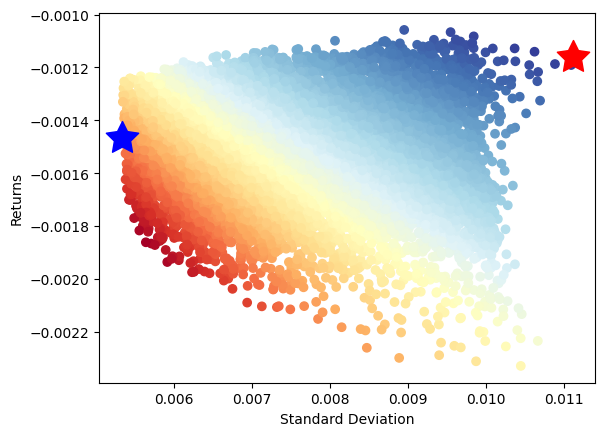

In [69]:
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)
plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=600)
plt.show()